# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch.csv',low_memory=False)

In [3]:
ch_df.describe()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
count,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,...,25192.000000,25192.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000
mean,13009.500000,765.843147,10.391959,6.122108,765.843147,10.391959,6.122108,2.889423,11.521255,14.596164,...,2.987496,984.930970,1.822815,1.581098,3.112845,0.968253,-0.107336,2.519217,765.843147,19.632601
std,7510.893988,429.034000,5.756146,3.017196,429.034000,5.756146,3.017196,2.431748,2.895621,7.412582,...,1.427527,1017.925784,0.879074,0.568260,1.603637,1.050827,0.968301,1.414660,429.034000,10.722314
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.574326,0.000000,1.000000,1.000000
25%,6505.250000,394.000000,5.000000,4.000000,394.000000,5.000000,4.000000,2.000000,9.000000,9.000000,...,2.000000,417.000000,1.000000,1.000000,2.000000,0.430426,-0.950428,1.000000,394.000000,10.000000
50%,13009.500000,764.000000,10.000000,5.000000,764.000000,10.000000,5.000000,2.000000,12.000000,15.000000,...,3.000000,909.000000,2.000000,2.000000,3.000000,0.677064,-0.260526,2.000000,764.000000,20.000000
75%,19513.750000,1138.000000,15.000000,7.000000,1138.000000,15.000000,7.000000,2.000000,14.000000,21.000000,...,4.000000,1384.000000,3.000000,2.000000,4.000000,1.161744,0.639379,4.000000,1138.000000,29.000000
max,26018.000000,1480.000000,20.000000,41.000000,1480.000000,20.000000,41.000000,39.000000,18.000000,30.000000,...,5.000000,9999.000000,9.000000,9.000000,6.000000,14.433318,3.008995,5.000000,1480.000000,37.000000


In [4]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
0,1,1,4,6,1,4,6,2,15,21,...,5.0,1656.0,3,1,4,1.262202,1.653178,5,1,1
1,2,1,5,5,1,5,5,2,12,21,...,3.0,1031.0,2,1,4,1.262202,1.973658,5,1,1
2,3,1,5,6,1,5,6,2,12,21,...,4.0,1320.0,2,1,4,1.262202,1.973658,5,1,1
3,4,1,6,3,1,6,3,2,11,21,...,1.0,164.0,3,1,4,1.262202,1.964425,5,1,1
4,5,1,7,4,1,7,4,2,16,21,...,4.0,1162.0,3,1,4,1.262202,1.638443,5,1,1


In [5]:
wm_df = pd.read_csv('wm.csv', low_memory = False)

In [6]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,Unnamed: 0,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,...,CSURV,CDEAD,welevel,religion,zone,wmweight,wscore,windex5,PSU,stratum
0,1,1,1,3,1,1,3,16,4,3,...,0.0,0.0,3.0,1,4,1.199659,1.580774,5,1,1
1,2,1,2,2,1,2,2,7,4,3,...,0.0,0.0,3.0,1,4,1.199659,1.355768,5,1,1
2,3,1,3,2,1,3,2,7,21,2,...,0.0,0.0,3.0,1,4,1.199659,1.351060,5,1,1
3,4,1,4,2,1,4,2,16,21,2,...,4.0,0.0,3.0,1,4,1.199659,1.653178,5,1,1
4,5,1,6,2,1,6,2,11,21,2,...,1.0,1.0,3.0,1,4,1.199659,1.964425,5,1,1


In [7]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [8]:
ch_wm_df = ch_wm_df[ch_wm_df.columns.drop(list(ch_wm_df.filter(regex='_y')))]

In [9]:
ch_wm_df.head()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,WDOM,WAGEM,WDOBFC,WDOBLC,MSTATUS,CEB,CSURV,CDEAD,welevel,wmweight
0,1,1,4,6,1,4,6,2,15,21,...,1204.0,27.0,1222.0,1280.0,1.0,4.0,4.0,0.0,3.0,1.199659
1,4,1,6,3,1,6,3,2,11,21,...,1307.0,29.0,1329.0,1329.0,1.0,2.0,1.0,1.0,3.0,1.199659
2,5,1,7,4,1,7,4,2,16,21,...,1201.0,22.0,1236.0,1320.0,1.0,3.0,3.0,0.0,3.0,1.199659
3,6,1,7,5,1,7,5,2,16,21,...,1201.0,22.0,1236.0,1320.0,1.0,3.0,3.0,0.0,3.0,1.199659
4,7,1,8,5,1,8,5,2,15,21,...,1220.0,26.0,1229.0,1289.0,1.0,3.0,3.0,0.0,3.0,1.199659


In [10]:
hh_df = pd.read_csv('hh.csv', low_memory = False)

In [11]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,Unnamed: 0,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,...,SI1,HHSEX,religion,zone,helevel,hhweight,wscore,windex5,PSU,stratum
0,1,1,1,16,2,4,3,2011,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.580774,5,1,1
1,2,1,2,7,2,4,3,2011,1,1,...,3.0,2.0,1.0,4,1.0,1.250765,1.355768,5,1,1
2,3,1,3,7,2,21,2,2011,1,1,...,3.0,2.0,1.0,4,2.0,1.250765,1.351060,5,1,1
3,4,1,4,15,2,21,2,2011,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.653178,5,1,1
4,5,1,5,12,2,21,2,2011,1,1,...,3.0,1.0,1.0,4,2.0,1.250765,1.973658,5,1,1


In [12]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [13]:
df = df[df.columns.drop(list(df.filter(regex='_y')))]

In [14]:
df.head()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,HW4,HW5A,HW5B,HW5C,HW5D,HW5Y,SI1,HHSEX,helevel,hhweight
0,1,1,4,6,1,4,6,2,15,21,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
1,4,1,6,3,1,6,3,2,11,21,...,1.0,NaN,B,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
2,5,1,7,4,1,7,4,2,16,21,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
3,6,1,7,5,1,7,5,2,16,21,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
4,7,1,8,5,1,8,5,2,15,21,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.250765


Remove ID columns

In [15]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [16]:
df['IM1'].unique()

array([ 1.,  2.,  3., nan,  9.])

In [17]:
df['AG2'].unique()

array([ 4.,  0.,  3.,  1.,  2., nan])

In [18]:
#The vaccination module is usually applied for children up to 3 years old. 
#You should subset the dataset to that target group before running the models. 
#If you don’t then most of card not seen for the older children will be because of missing data. 
#Unfortunately this means that you will have less data to model.
df = df.loc[df['AG2'] <= 3]
len(df)

30689

In [19]:
#Columns removed as per Unicef's feedback. 
#The sample weights (chweight, hhweight, etc) should not be used as features. 
#You can use weighted logistic regression if you want to incorporate the sample weight, 
#in this case just use the children sample weight. 
#Similarly, I would not use PSU and Stratum as features. 
#If you use the administrative division (e.g. region) as a features it should capture the stratum variable.

df = df.loc[:, ~df.columns.str.startswith('PSU')]
df = df.loc[:, ~df.columns.str.startswith('stratum')]

#Remove age columns
df = df.loc[:, ~df.columns.str.startswith('AG1D')]
df = df.loc[:, ~df.columns.str.startswith('AG2M')]
df = df.loc[:, ~df.columns.str.startswith('AG1Y')]
df = df.loc[:, ~df.columns.str.startswith('AG2')]
df = df.loc[:, ~df.columns.str.startswith('CAGE')]
df = df.loc[:, ~df.columns.str.startswith('CAGED')]
df = df.loc[:, ~df.columns.str.startswith('CAGE_6')]
df = df.loc[:, ~df.columns.str.startswith('CAGE_11')]

#Remove height columns
df = df.loc[:, ~df.columns.str.startswith('hhweight')]
df = df.loc[:, ~df.columns.str.startswith('HAZ')]
df = df.loc[:, ~df.columns.str.startswith('HAP')]
df = df.loc[:, ~df.columns.str.startswith('HAM')]
df = df.loc[:, ~df.columns.str.startswith('AN4')]

#Remove weight columns
df = df.loc[:, ~df.columns.str.startswith('WHM')]
df = df.loc[:, ~df.columns.str.startswith('WHZ')]
df = df.loc[:, ~df.columns.str.startswith('WHP')]
df = df.loc[:, ~df.columns.str.startswith('AN3')]
df = df.loc[:, ~df.columns.str.startswith('WAZ')]
df = df.loc[:, ~df.columns.str.startswith('WAM')]
df = df.loc[:, ~df.columns.str.startswith('chweight')]

In [20]:
len(df)

30689

In [21]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['card_seen'] = np.where(df['IM1'] == 1, 1,0)

In [22]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

In [23]:
df = df.fillna(0)

In [24]:
target = df['card_seen']
target.unique()

array([1, 0], dtype=int64)

In [25]:
#One hot encoding of categorical values using get_dummies function

dummies = pd.get_dummies(df)

In [26]:
y_cols=['card_seen']
X=dummies
y=dummies[y_cols]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(), test_size=0.3, random_state=0)

# Handling data imbalance by downsampling the majority class in Training data

In [28]:
df_majority = X_train[X_train.card_seen == 0]
df_minority = X_train[X_train.card_seen == 1]

print(len(df_majority))
print(len(df_minority))

min_class_len = len(df_minority)

16629
4853


In [29]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace= True,     # sample with replacement
                                 n_samples=min_class_len,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with downsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled.card_seen.value_counts()

1    4853
0    4853
Name: card_seen, dtype: int64

In [30]:
X_train = df_downsampled
len(X_train)

9706

In [31]:
y_train = X_train['card_seen']

In [32]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='card_seen')))]
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='card_seen')))]

# Logistic Regression Classifier

In [33]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [35]:
len(feature_importance)

827

In [36]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [37]:
people = people[0:50] 
score = score[0:50] 
x_pos = np.arange(len(people)) 

In [38]:
# Read the Labels File into a df
labels_df = pd.read_csv('label_nig.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [39]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,BR1,0.838621
1,MN5,0.488407
2,wscore,0.381228
3,MN4B,0.327332
4,FLAG,0.290058
5,HC8L,0.278377
6,religion,0.252795
7,HC8O,0.240716
8,MN22A,0.239433
9,BF4,0.229779


In [40]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_LR_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,BR1,0.838621,Birth certificate
1,MN5,0.488407,NaN
2,wscore,0.381228,Combined wealth score
3,MN4B,0.327332,NaN
4,FLAG,0.290058,Flag for anthropometric indicators
5,HC8L,0.278377,Water lifting pump
6,religion,0.252795,NaN
7,HC8O,0.240716,NaN
8,MN22A,0.239433,NaN
9,BF4,0.229779,NaN


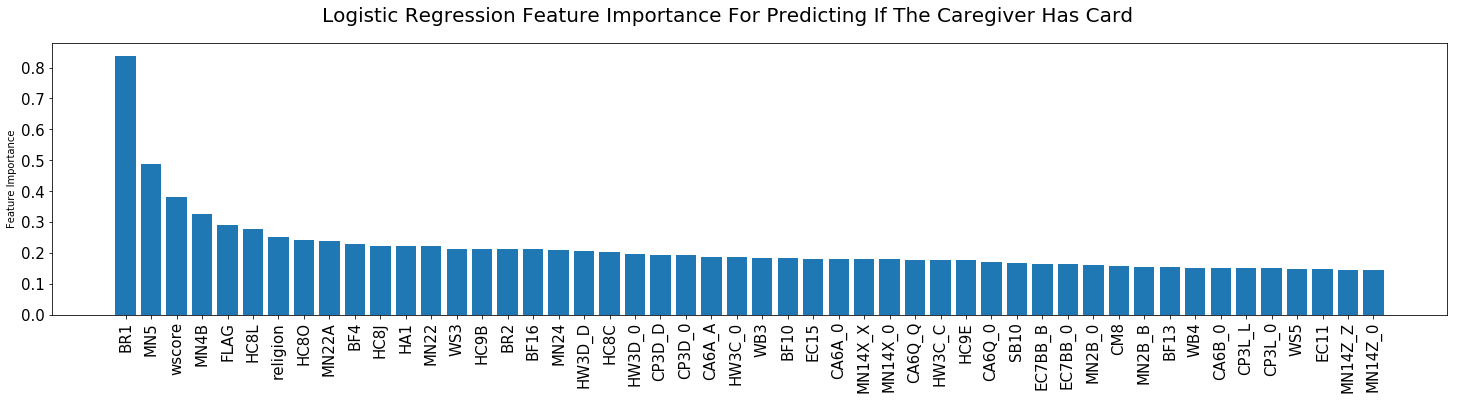

In [41]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [42]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [43]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.72      0.81      7139
          1       0.45      0.77      0.57      2068

avg / total       0.81      0.73      0.75      9207



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [44]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.75


In [46]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.75      0.83      7139
          1       0.47      0.76      0.58      2068

avg / total       0.82      0.75      0.77      9207



Let's validate the results of Random Forests Model with kfold cross validation

In [47]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.730


In [48]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [49]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [50]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,BR1,0.026420
1,helevel,0.019615
2,ED4B,0.018404
3,HC1B,0.017955
4,welevel,0.014149
5,CM2D,0.014038
6,HC1C,0.013231
7,ED4A,0.012033
8,Unnamed: 0,0.011858
9,melevel,0.011443


In [51]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_RF_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,BR1,0.026420,Birth certificate
1,helevel,0.019615,Education of household head
2,ED4B,0.018404,Highest grade completed at that level
3,HC1B,0.017955,Mother tongue of household head
4,welevel,0.014149,NaN
5,CM2D,0.014038,NaN
6,HC1C,0.013231,NaN
7,ED4A,0.012033,NaN
8,Unnamed: 0,0.011858,NaN
9,melevel,0.011443,Mother's education


In [52]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 

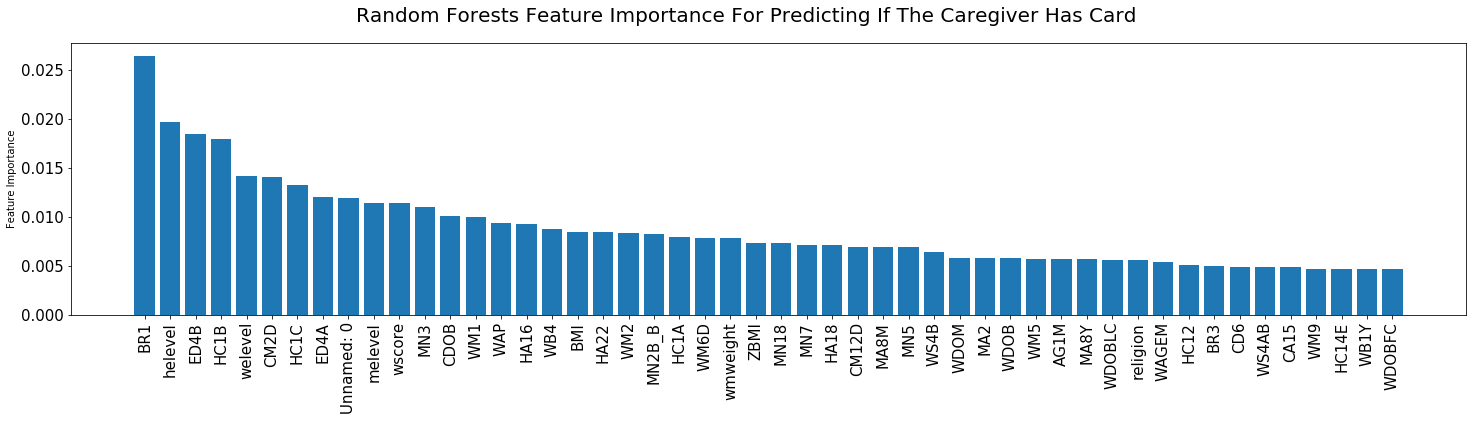

In [53]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

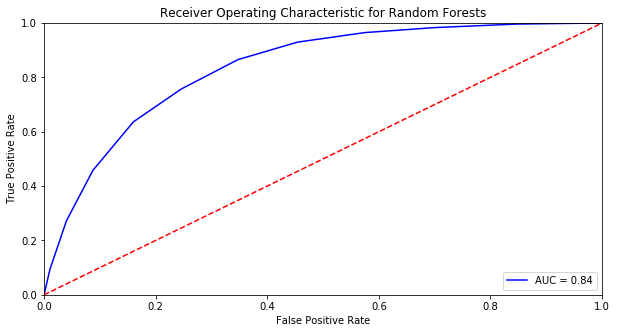

In [54]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [55]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [56]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.76


In [57]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.715


In [58]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [59]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [60]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:100], columns=['name','Score'])
features_df

,name,Score
0,CDOB,0.071108
1,Unnamed: 0,0.049643
2,BR1,0.047710
3,HC1C,0.042308
4,MN5,0.025423
5,ZBMI,0.023564
6,CM12D,0.021888
7,WM1,0.018926
8,wscore,0.018007
9,TN12_1,0.016344


In [61]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_GB_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,CDOB,0.071108,Date of birth of child (CMC)
1,Unnamed: 0,0.049643,NaN
2,BR1,0.047710,Birth certificate
3,HC1C,0.042308,NaN
4,MN5,0.025423,NaN
5,ZBMI,0.023564,Body Mass Index z-score WHO
6,CM12D,0.021888,NaN
7,WM1,0.018926,NaN
8,wscore,0.018007,Combined wealth score
9,TN12_1,0.016344,Person 1 who slept under net


In [62]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

In [63]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.74      0.82      7139
          1       0.48      0.82      0.60      2068

avg / total       0.83      0.76      0.77      9207



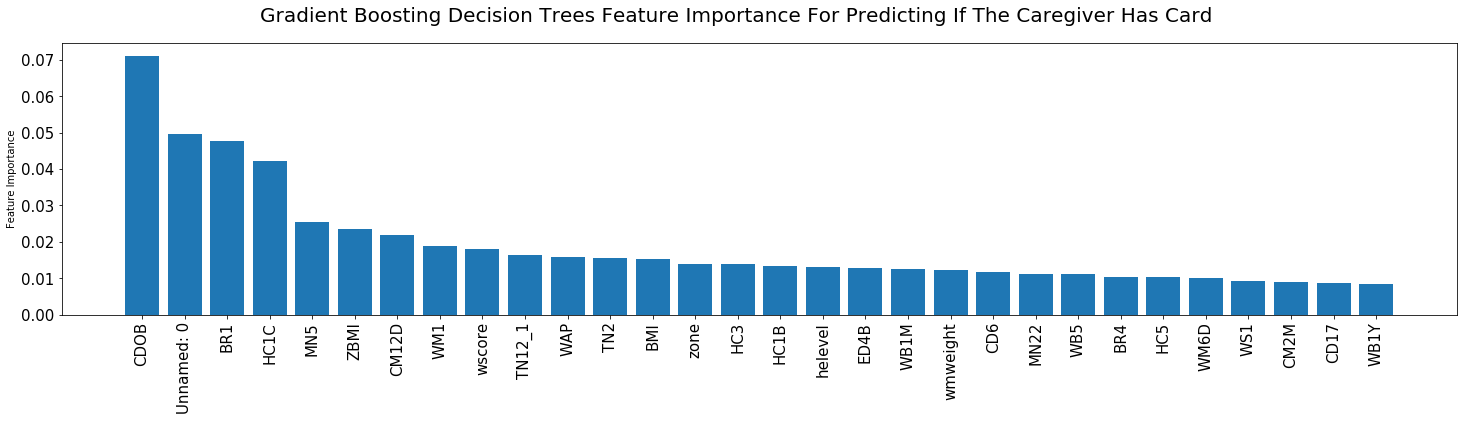

In [64]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

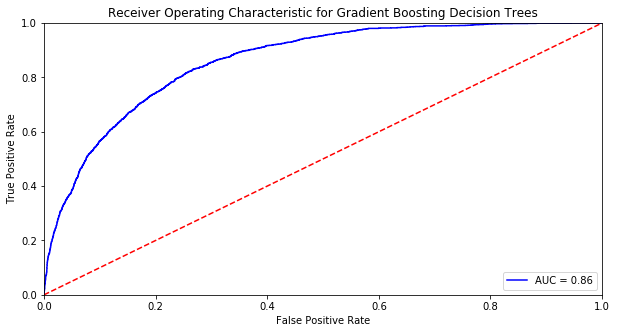

In [65]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gbd.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Gradient Boosting Decision Trees')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print(final_df.head())
nan_df = final_df[final_df.label.isnull()]
len(nan_df)

         name     Score                         label
0        CDOB  0.071108  Date of birth of child (CMC)
1  Unnamed: 0  0.049643                           NaN
2         BR1  0.047710             Birth certificate
3        HC1C  0.042308                           NaN
4         MN5  0.025423                           NaN


61

In [67]:
f_name_lst = list(nan_df.name)

In [68]:
final_df = final_df[~final_df['name'].isin(f_name_lst)]

In [69]:
final_df.sort_values('Score')

,name,Score,label
99,CA3,0.002049,Child ate less or more during illness
90,HC2,0.002538,Number of rooms used for sleeping
89,HC9B,0.002565,Mobile telephone
88,BR2,0.002628,Birth registered
87,EC3B,0.002682,"In past week, days left with other child for m..."
81,TN12_2,0.003059,Person 2 who slept under net
80,HC8J,0.003140,Sewing / Knitting machine
78,BR3,0.003280,Know how to register birth
76,WS5,0.003351,Person collecting water
73,CA15,0.003374,What was done to dispose of the stools


In [70]:
selected_features = list(final_df.name)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [71]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
X_test = pd.get_dummies(X_test)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [73]:
feature_importance = (logreg.coef_[0])
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [74]:
col_list = list(X_train.columns[sorted_idx])
label_list = []
for i in col_list:
    label_row = final_df[final_df['name'] == i]
    label_list.append(list(label_row.label))

label_list = [''.join(x) for x in label_list]
print(label_list)

['Birth certificate', 'Mobile telephone', 'Child knows name and recognizes symbol of all numbers from 1-10', 'Religion of household head', 'Household has mosquito nets', 'Treat water to make safer for drinking', 'Know how to register birth', 'Sewing / Knitting machine', 'Person collecting water', 'Sheep', 'Number of mosquito nets', 'Households using this toilet facility', 'Main material of exterior wall', 'Body Mass Index z-score WHO', 'Number of rooms used for sleeping', 'Acres of agricultural land members of household owns', 'Time (in minutes) to get water and come back', 'What was done to dispose of the stools', 'Cattle, milk cows, buffaloes or bulls', 'Weight for age percentile NCHS', 'Month of birth of child', 'Body Mass Index WHO', 'Person 4 who slept under net', 'Date of birth of child (CMC)', 'Person 2 who slept under net', 'Main source of drinking water', 'Mother tongue of household head', 'Chickens', 'Child ate less or more during illness', 'Main material of floor', 'Highest 

In [75]:
result_df = pd.DataFrame({'Feature': label_list ,'Coefficient': feature_importance[sorted_idx],'Column' :col_list})
result_df.head()

,Coefficient,Column,Feature
0,-3.753355,BR1,Birth certificate
1,-1.426731,HC9B,Mobile telephone
2,-1.414071,EC10,Child knows name and recognizes symbol of all ...
3,-0.892260,HC1A,Religion of household head
4,-0.601058,TN1,Household has mosquito nets


In [76]:
result_df.to_csv('result_Nigeria.csv')

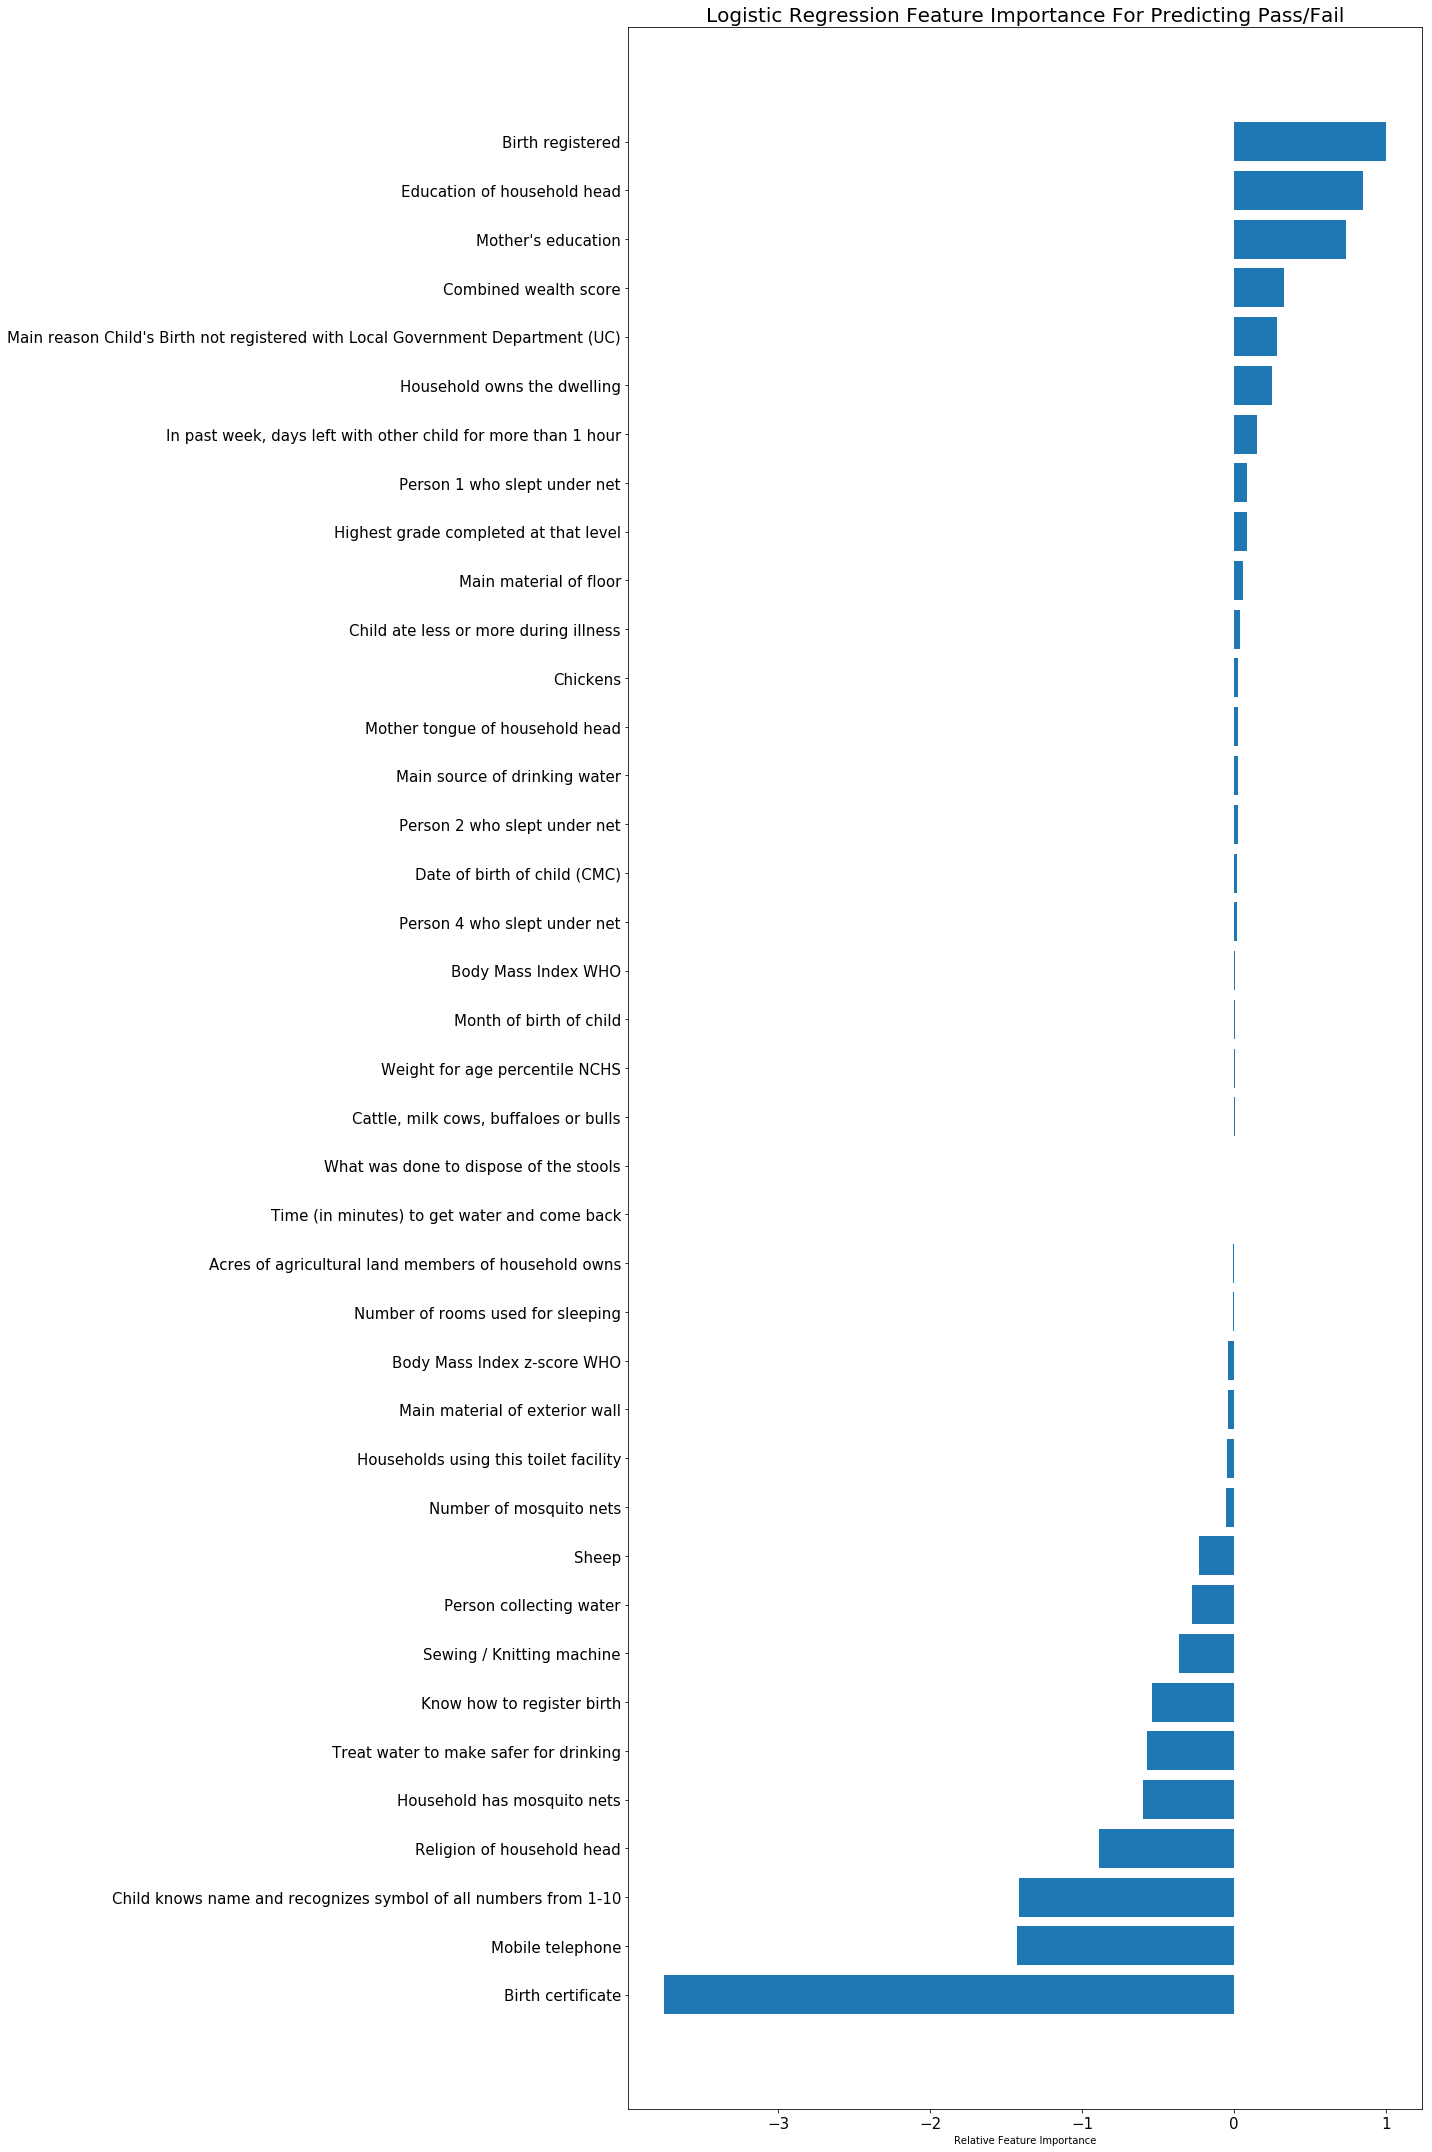

In [77]:
featfig = plt.figure(figsize=(20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(label_list, fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.title('Logistic Regression Feature Importance For Predicting Pass/Fail', fontsize=20)
plt.tight_layout()   
plt.show()